<img src="https://rhyme.com/assets/img/logo-dark.png" align="center"> <h2 align="center">Logistic Regression: A Sentiment Analysis Case Study</h2>

### Introduction
___

- IMDB movie reviews dataset
- http://ai.stanford.edu/~amaas/data/sentiment
- Contains 25000 positive and 25000 negative reviews
<img src="https://i.imgur.com/lQNnqgi.png" align="center">
- Contains at most reviews per movie
- At least 7 stars out of 10 $\rightarrow$ positive (label = 1)
- At most 4 stars out of 10 $\rightarrow$ negative (label = 0)
- 50/50 train/test split
- Evaluation accuracy

<b>Features: bag of 1-grams with TF-IDF values</b>:
- Extremely sparse feature matrix - close to 97% are zeros

 <b>Model: Logistic regression</b>
- $p(y = 1|x) = \sigma(w^{T}x)$
- Linear classification model
- Can handle sparse data
- Fast to train
- Weights can be interpreted
<img src="https://i.imgur.com/VieM41f.png" align="center" width=500 height=500>

### Task 1: Loading the dataset
---

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('data/movie_data.csv')
df.head(10)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


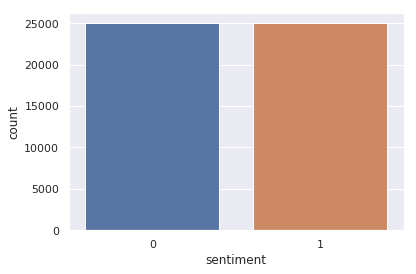

In [3]:
sns.countplot(df.sentiment)

In [4]:
df['review'][1]

"OK... so... I really like Kris Kristofferson and his usual easy going delivery of lines in his movies. Age has helped him with his soft spoken low energy style and he will steal a scene effortlessly. But, Disappearance is his misstep. Holy Moly, this was a bad movie! <br /><br />I must give kudos to the cinematography and and the actors, including Kris, for trying their darndest to make sense from this goofy, confusing story! None of it made sense and Kris probably didn't understand it either and he was just going through the motions hoping someone would come up to him and tell him what it was all about! <br /><br />I don't care that everyone on this movie was doing out of love for the project, or some such nonsense... I've seen low budget movies that had a plot for goodness sake! This had none, zilcho, nada, zippo, empty of reason... a complete waste of good talent, scenery and celluloid! <br /><br />I rented this piece of garbage for a buck, and I want my money back! I want my 2 hou

## <h2 align="center">Bag of words / Bag of N-grams model</h2>

### Task 2: Transforming documents into feature vectors

Below, we will call the fit_transform method on CountVectorizer. This will construct the vocabulary of the bag-of-words model and transform the following three sentences into sparse feature vectors:
1. The sun is shining
2. The weather is sweet
3. The sun is shining, the weather is sweet, and one and one is two


In [5]:
docs = np.array(['The sun is shining',
'The weather is sweet',
'The sun is shining, the weather is sweet, and one and one is two'])

In [6]:
count = CountVectorizer()
bag = count.fit_transform(docs)

In [7]:
count.vocabulary_

{'the': 6,
 'sun': 4,
 'is': 1,
 'shining': 3,
 'weather': 8,
 'sweet': 5,
 'and': 0,
 'one': 2,
 'two': 7}

In [8]:
bag.toarray()

array([[0, 1, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 1],
       [2, 3, 2, 1, 1, 1, 2, 1, 1]], dtype=int64)

Raw term frequencies: *tf (t,d)*—the number of times a term t occurs in a document *d*

### Task 3: Word relevancy using term frequency-inverse document frequency

$$\text{tf-idf}(t,d)=\text{tf (t,d)}\times \text{idf}(t,d)$$

$$\text{idf}(t,d) = \text{log}\frac{n_d}{1+\text{df}(d, t)},$$

where $n_d$ is the total number of documents, and df(d, t) is the number of documents d that contain the term t.

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)
tfidf = TfidfTransformer(use_idf=True,norm='l2',smooth_idf=True)
print(tfidf.fit_transform(bag).toarray())

[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


The equations for the idf and tf-idf that are implemented in scikit-learn are:

$$\text{idf} (t,d) = log\frac{1 + n_d}{1 + \text{df}(d, t)}$$
The tf-idf equation that is implemented in scikit-learn is as follows:

$$\text{tf-idf}(t,d) = \text{tf}(t,d) \times (\text{idf}(t,d)+1)$$

### Task 4: Data Preparation

In [11]:
df.loc[0,'review'][-50:]

'is seven.<br /><br />Title (Brazil): Not Available'

In [12]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [13]:
df['review'] = df['review'].apply(preprocessor)

### Task 5: Tokenization of documents

In [14]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [15]:
def tokenizer(text):
    return text.split()

In [20]:
def tokeinizer_porter(text):
    return [porter.stem(word) for word in tokenizer(text)]

In [21]:
tokenizer('Coders love travelling and dreaming')

['Coders', 'love', 'travelling', 'and', 'dreaming']

In [22]:
tokeinizer_porter('Coders love travelling and dreaming')

['coder', 'love', 'travel', 'and', 'dream']

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/rhyme/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
[w for w in tokeinizer_porter('Coders love travelling and a dreaming')[-10:]if w not in stop]

['coder', 'love', 'travel', 'dream']

### Task 6: Transform Text Data into TF-IDF Vectors

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,lowercase=False,
                        preprocessor=None,tokenizer=tokeinizer_porter,
                       use_idf=True,
                       smooth_idf=True,
                       norm='l2')

y = df.sentiment.values
X = tfidf.fit_transform(df.review)


### Task 7: Document Classification using Logistic Regression

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state = 42,shuffle=False)

In [29]:
import pickle
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5,
                          scoring='accuracy',
                          n_jobs=-1,
                          random_state=42,
                          verbose=3,max_iter=300).fit(X_train,y_train)

saved_model = open('saved_model.sav','wb')
pickle.dump(clf,saved_model)
saved_model.close()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min finished


### Task 8: Model Evaluation

In [30]:
filename = 'saved_model.sav'
saved_clf = pickle.load(open(filename,'rb'))


In [31]:
saved_clf.score(X_test,y_test)

/home/rhyme/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1926: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


0.89604